In [2]:
import sys
sys.path.append('../../sportran/')
import sportran as st

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from scipy.interpolate import CubicSpline
def model(x, y):
    return CubicSpline(np.concatenate([-x[::-1], x[1:]]), np.concatenate([y[::-1], y[1:]]))

In [6]:
dc=np.load('data/bayesian/CsF/dc_minimal.npy', allow_pickle=True).item()

In [6]:
flux=st.HeatCurrent([(dc['qflux']), (dc['ele_flux'])],
                      DT_FS=1,
                      TEMPERATURE=dc['Temperature'],
                      VOLUME=dc['Volume'],
                      UNITS='metal'
                     )

Using multicomponent code.


In [7]:
flux_resample=flux.resample(fstar_THz=20)

Using multicomponent code.
-----------------------------------------------------
  RESAMPLE TIME SERIES
-----------------------------------------------------
 Original Nyquist freq  f_Ny =     500.00000 THz
 Resampling freq          f* =      20.00000 THz
 Sampling time         TSKIP =            25 steps
                             =        25.000 fs
 Original  n. of frequencies =        100001
 Resampled n. of frequencies =          4001
 min(PSD)          (pre-filter&sample) =      0.00000
 min(PSD)         (post-filter&sample) =      0.00018
 % of original PSD Power f<f* (pre-filter&sample)  = 99.707 %
 fPSD not calculated before resampling
 -----------------------------------------------------



In [8]:
flux_resample.bayesian_analysis(model, 6, log_like='off')
bay=flux_resample.bayes

  0%|          | 0/2000000 [00:00<?, ?it/s]

MCMC with 6 parameters and 16 walkers
Running up to 2000000 steps


  0%|          | 2004/2000000 [00:47<14:48:07, 37.49it/s]

[47.56958255 44.11355188 51.17793813 55.38037545 63.56320725 66.61683241]
[48.40380019 43.58645208 55.92207525 55.53770331 58.67302588 57.95439241]


  0%|          | 4007/2000000 [01:34<13:08:38, 42.18it/s]

[53.37353507 50.54619911 59.18617764 69.63080844 75.90040159 69.67040961]


  0%|          | 6007/2000000 [02:20<14:00:08, 39.56it/s]

[72.17135712 56.54666651 59.40000353 71.94144704 78.75775282 74.94433689]


  0%|          | 8008/2000000 [03:07<14:02:05, 39.43it/s]

[74.15366135 65.23008446 68.0890613  71.3740177  69.28671402 70.58729274]


  0%|          | 9750/2000000 [03:49<13:02:17, 42.40it/s]


MCMC autocorrelation time = [75.58288267 68.00710591 70.59427719 71.03611725 69.6863721  71.44625762]
MCMC burn in = 453; thin = 102
-----------------------------------------------------
  BAYESIAN ANALYSIS
-----------------------------------------------------
  L_01   =           0.000173 +/-   0.000023
-----------------------------------------------------



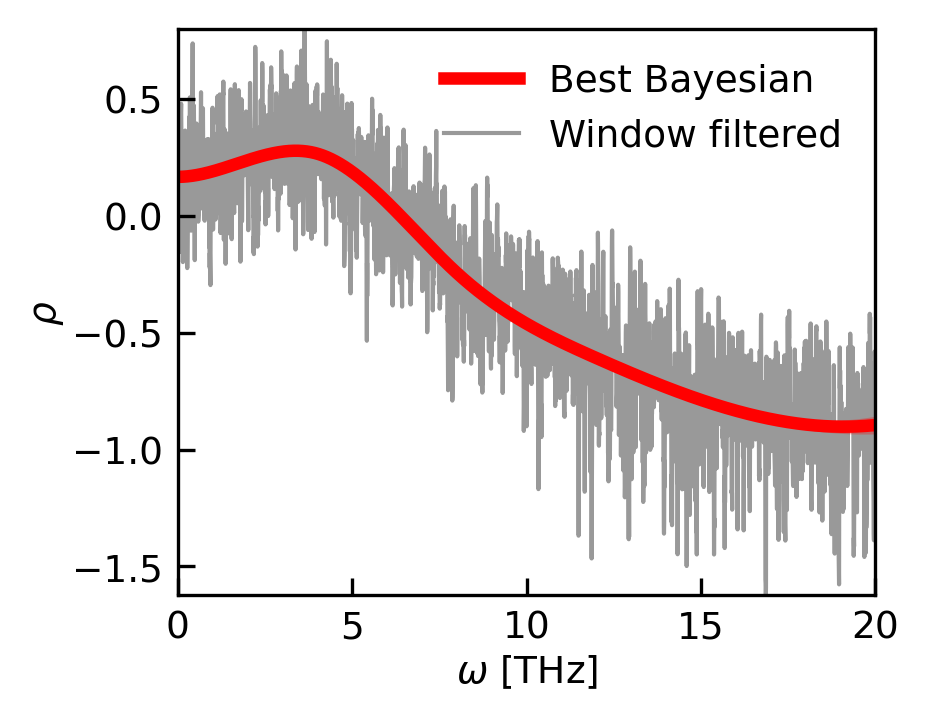

In [9]:
s=bay.omega[-1]/flux_resample.freqs_THz[-1]
cubic_mean_spline=bay.model(bay.omega_fixed, bay.parameters_mean)
cubic_max_spline=bay.model(bay.omega_fixed, bay.parameters_mean+bay.parameters_std)
cubic_min_spline=bay.model(bay.omega_fixed, bay.parameters_mean-bay.parameters_std)
f, ax=plt.subplots(figsize=[3,2.5])
ax.plot(flux_resample.freqs_THz, cubic_mean_spline(bay.omega), color='red', label='Best Bayesian',
        linewidth=3, zorder=1)
ax.fill_between(flux_resample.freqs_THz, 
                cubic_max_spline(bay.omega), cubic_min_spline(bay.omega), color='red', alpha=0.3, zorder=1)
Nf=5
ax.plot(flux_resample.freqs_THz, st.md.tools.filter.runavefilter(bay.noisy_data, Nf),
        linewidth=1, color='black', zorder=0,
        label='Window filtered', alpha=0.4)
ax.set_xlabel(r'$\omega$ [THz]')
ax.set_ylabel(r'$\rho$')
plt.legend(loc='best', fancybox=True, framealpha=0.0)

In [7]:
sdata=np.loadtxt('data/bayesian/mock_data/mock_data_sin.dat').T

s_noise=sdata[1, 1:]*np.ones((2,2,(sdata[1,1:]).shape[0]))
true_s=(np.sin(sdata[0]/2.2 - np.pi/4)*0.98 + np.sin(-sdata[0]/2.2 - np.pi/4)*0.98)/2

In [8]:
sdata[1, ].shape

(4001,)

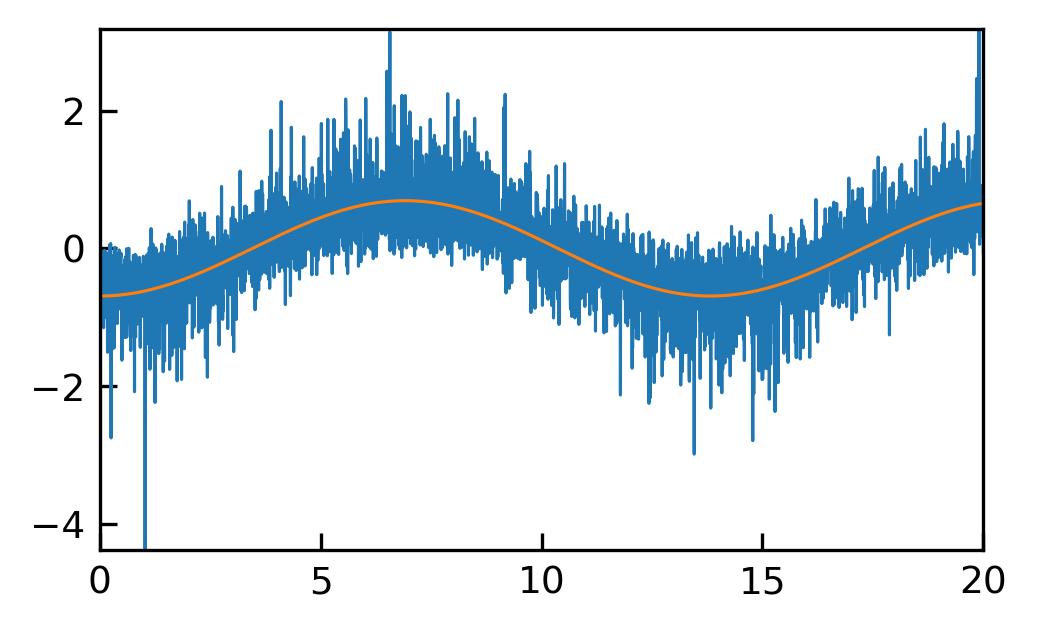

In [9]:
plt.plot(sdata[0],sdata[1])
plt.plot(sdata[0],true_s)

In [61]:
npr=8
bay=st.md.bayes.BayesFilter((s_noise[:,:,:])*3,model,n_parameters=npr, n_components=3)

bay.run_mcmc_scratch(n_parameters=npr,
             n_steps=2000000,
             is_restart=False,
             mask=None,
             filename='chain_sin_{}.h5'.format(npr),
             n_walkers=None,
             log_like='off')


  0%|          | 0/2000000 [00:00<?, ?it/s]/Users/enricodrigo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  0%|          | 5/2000000 [00:00<13:35:21, 40.88it/s]

MCMC with 8 parameters and 16 walkers
Running up to 2000000 steps


  0%|          | 1005/2000000 [00:23<13:03:38, 42.52it/s]

[52.52052256 45.29009383 46.06495915 39.15516239 31.32441985 43.18288245
 39.75463365 42.24679089]


  0%|          | 2000/2000000 [00:46<13:00:10, 42.68it/s]

[59.93213359 64.39415448 61.3360152  72.8807202  44.65552738 60.20953229
 62.27225641 72.11608274]


  0%|          | 3000/2000000 [01:10<12:57:59, 42.78it/s]

[63.48797952 73.40219032 68.21241101 79.33816729 58.44895418 62.61355588
 75.09302373 90.79058931]


  0%|          | 4000/2000000 [01:35<13:05:01, 42.38it/s]

[ 67.89079957  74.00902168  86.91704156  83.82339647  74.79126866
  72.23661195  82.98389665 103.42432584]


  0%|          | 5000/2000000 [02:00<12:50:28, 43.16it/s]

[ 70.02579636  82.52547107  87.88187256  93.60501833  77.50394872
  83.04917987  81.42823692 110.87267164]


  0%|          | 6005/2000000 [02:25<15:10:46, 36.49it/s]

[ 86.88981206  86.5459709  107.47736025 100.562028    93.82918505
 107.33162043 110.88082035 101.28398463]


  0%|          | 7005/2000000 [02:48<15:11:42, 36.43it/s]

[ 82.08140325 101.42590051  99.41576366 106.71939166 103.50220326
 110.11573001 105.94016955 109.31752572]


  0%|          | 8005/2000000 [03:12<15:15:36, 36.26it/s]

[ 84.22420095  94.75212313  99.3201634  104.97825411 100.86375138
 112.89598529 109.49118536 104.49414648]


  0%|          | 9005/2000000 [03:36<15:23:41, 35.92it/s]

[ 87.31856378 100.55528496 108.54280858  95.34413573 106.62617805
 111.39837253 116.66214893 107.45528937]


  0%|          | 10000/2000000 [04:00<12:53:28, 42.88it/s]

[ 94.94666575 101.09596165 113.93457187  94.49916734 105.08628408
 111.52025455 126.01107395 108.57378042]


  1%|          | 11000/2000000 [04:24<13:04:13, 42.27it/s]

[101.05536735 102.13101542 113.2559194   96.74134884 104.27528048
 107.78577403 122.23352706 113.48545363]


  1%|          | 12000/2000000 [04:48<13:04:45, 42.22it/s]

[103.13952734 100.06935884 118.82605796 100.19908656 107.07361816
 104.29966163 120.46947372 118.85606441]


  1%|          | 12250/2000000 [04:54<13:17:06, 41.56it/s]


900  discard
MCMC autocorrelation time = [103.67815919 102.95652762 119.76512969 100.52440087 108.18139875
 104.50237345 121.36627086 118.64874278]
MCMC burn in = 900; thin = 150


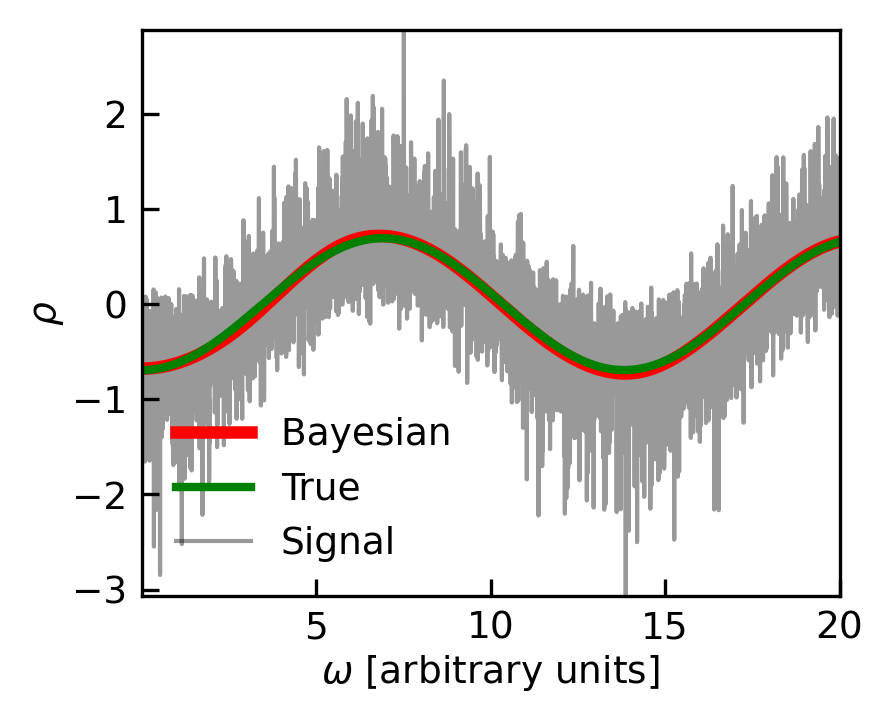

In [67]:
s=bay.omega[-1]/sdata[0,-1]
cubic_mean_spline=bay.model(bay.omega_fixed, bay.parameters_mean)
cubic_max_spline=bay.model(bay.omega_fixed, bay.parameters_mean+bay.parameters_std)
cubic_min_spline=bay.model(bay.omega_fixed, bay.parameters_mean-bay.parameters_std)
f, ax=plt.subplots(figsize=[3,2.5])
ax.plot(sdata[0][1:], cubic_mean_spline(bay.omega), color='red', label='Bayesian ',
        linewidth=3, zorder=1)
ax.plot(sdata[0][1:], true_s[1:], color='green', label='True',
        linewidth=2, zorder=1)
ax.fill_between(sdata[0][1:], 
                cubic_max_spline(bay.omega), cubic_min_spline(bay.omega), color='red', alpha=0.3, zorder=1)
Nf=0
ax.plot(sdata[0][1:], st.md.tools.filter.runavefilter(bay.noisy_data, Nf),
        linewidth=1, color='black', zorder=0,
        label='Signal', alpha=0.4)
ax.set_xlabel(r'$\omega$ [arbitrary units]')
ax.set_ylabel(r'$\rho$')
plt.legend(loc='best', fancybox=True, framealpha=0.0)